In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('mushrooms.csv')

In [3]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
data.shape

(8124, 23)

In [5]:
labels = data['class']
labels

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [6]:
features = data.copy()
features = features.drop(['class'], axis=1)

In [7]:
features

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Cap Shape")]

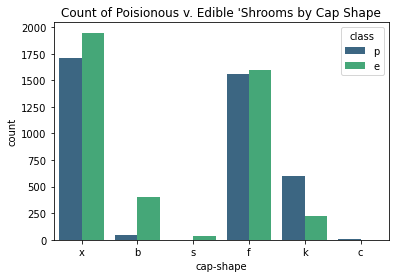

In [8]:
sb.countplot(data=data, x='cap-shape', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Cap Shape')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Cap Surface")]

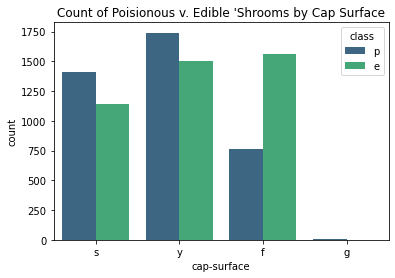

In [9]:
sb.countplot(data=data, x='cap-surface', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Cap Surface')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Cap Color")]

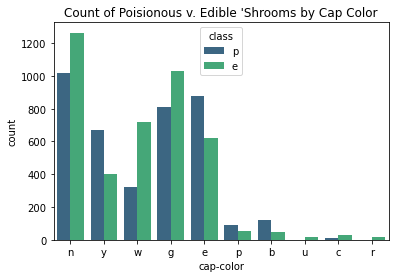

In [10]:
sb.countplot(data=data, x='cap-color', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Cap Color')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Bruises")]

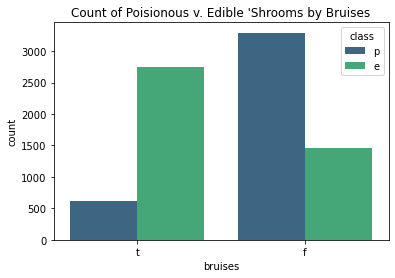

In [11]:
sb.countplot(data=data, x='bruises', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Bruises')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Cap Odor")]

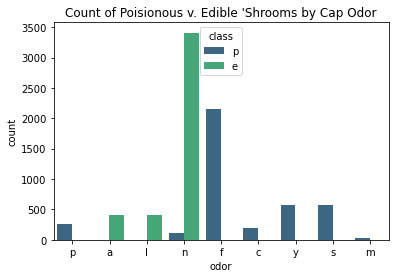

In [12]:
sb.countplot(data=data, x='odor', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Cap Odor')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Gill Attachment")]

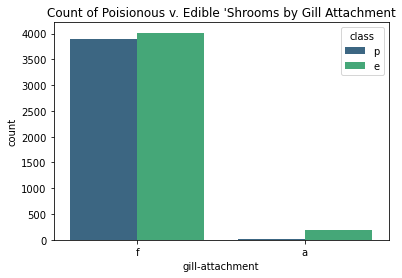

In [13]:
sb.countplot(data=data, x='gill-attachment', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Gill Attachment')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Gill-Spacing")]

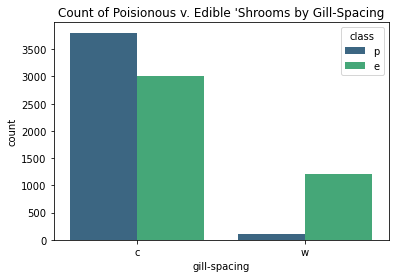

In [14]:
sb.countplot(data=data, x='gill-spacing', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Gill-Spacing')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Gill Size")]

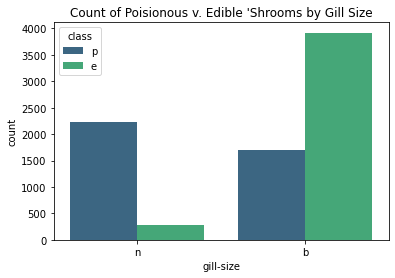

In [15]:
sb.countplot(data=data, x='gill-size', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Gill Size')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Gill Color")]

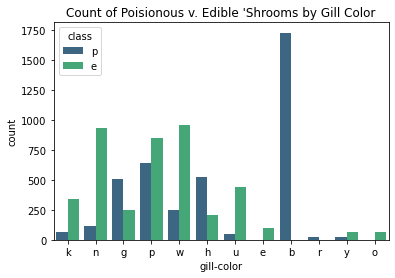

In [16]:
sb.countplot(data=data, x='gill-color', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Gill Color')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Stalk Shape")]

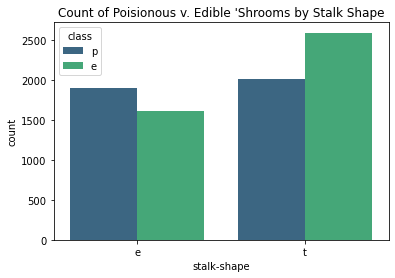

In [17]:
sb.countplot(data=data, x='stalk-shape', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Stalk Shape')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Stalk Root")]

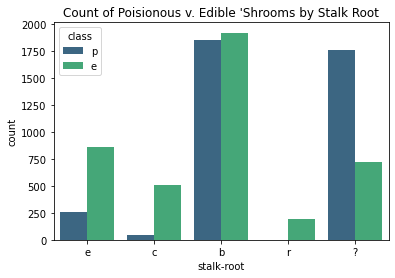

In [18]:
sb.countplot(data=data, x='stalk-root', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Stalk Root')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Above Ring Stalk Surface")]

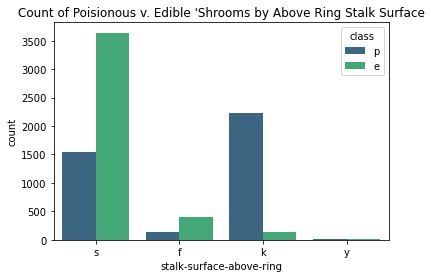

In [19]:
sb.countplot(data=data, x='stalk-surface-above-ring', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Above Ring Stalk Surface')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Below-Ring Stalk Surface")]

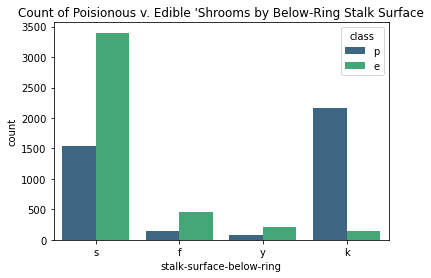

In [20]:
sb.countplot(data=data, x='stalk-surface-below-ring', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Below-Ring Stalk Surface')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Above-Ring Stalk Color")]

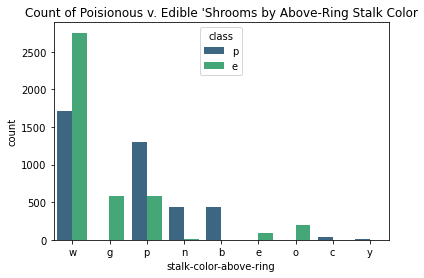

In [21]:
sb.countplot(data=data, x='stalk-color-above-ring', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Above-Ring Stalk Color')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Below-Ring Stalk Color")]

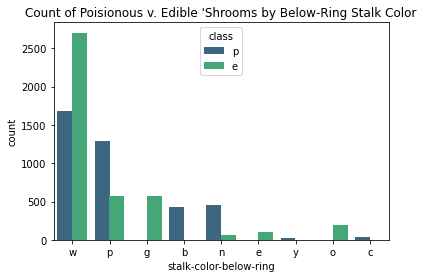

In [22]:
sb.countplot(data=data, x='stalk-color-below-ring', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Below-Ring Stalk Color')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Veil Type")]

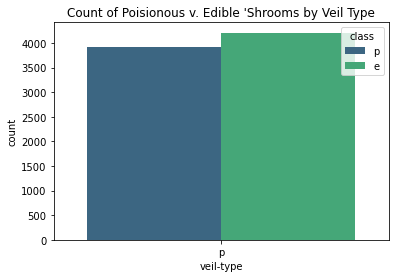

In [23]:
sb.countplot(data=data, x='veil-type', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Veil Type')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Veil Color")]

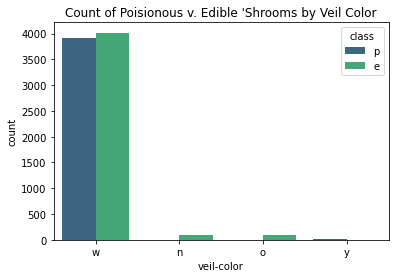

In [24]:
sb.countplot(data=data, x='veil-color', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Veil Color')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Ring Number")]

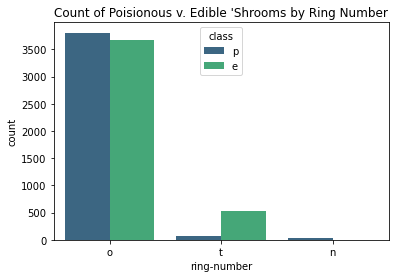

In [25]:
sb.countplot(data=data, x='ring-number', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Ring Number')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Ring Type")]

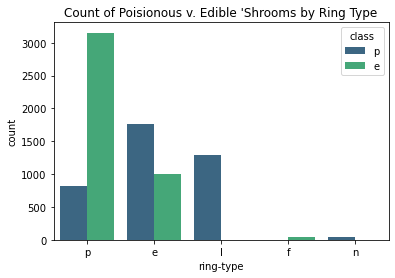

In [26]:
sb.countplot(data=data, x='ring-type', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Ring Type')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Spore Print Color")]

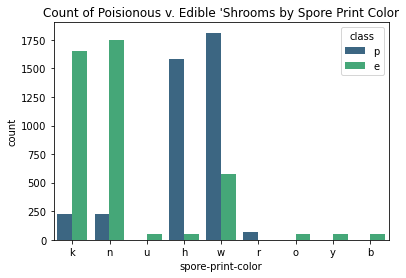

In [27]:
sb.countplot(data=data, x='spore-print-color', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Spore Print Color')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Population")]

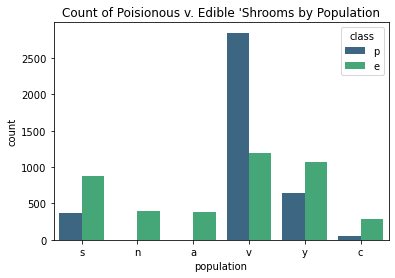

In [28]:
sb.countplot(data=data, x='population', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Population')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Habitat")]

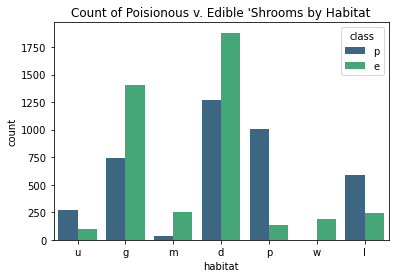

In [29]:
sb.countplot(data=data, x='habitat', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Habitat')

In [30]:
# Now,before building a decision tree model, remove gill attachment, stalk shape, and veil color since their countplots 
# reveal a rougly equal counts for poisonous and edible samples across all categories.  Additionally, remove stalk root,
#because it has missing data and veil type because all samples have the same value for this features.

In [62]:
removed_features = \
    ['gill-attachment', 'stalk-shape', 'stalk-root', 'veil-type', 'veil-color', 'ring-number']

In [63]:
_features = features.copy()
_features = _features.drop(removed_features, axis = 1)

In [64]:
_features

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,c,n,k,s,s,w,w,p,k,s,u
1,x,s,y,t,a,c,b,k,s,s,w,w,p,n,n,g
2,b,s,w,t,l,c,b,n,s,s,w,w,p,n,n,m
3,x,y,w,t,p,c,n,n,s,s,w,w,p,k,s,u
4,x,s,g,f,n,w,b,k,s,s,w,w,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,c,b,y,s,s,o,o,p,b,c,l
8120,x,s,n,f,n,c,b,y,s,s,o,o,p,b,v,l
8121,f,s,n,f,n,c,b,n,s,s,o,o,p,b,c,l
8122,k,y,n,f,y,c,n,b,s,k,w,w,e,w,v,l


In [65]:
_features[10:15]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
10,x,y,y,t,l,c,b,g,s,s,w,w,p,n,n,g
11,x,y,y,t,a,c,b,n,s,s,w,w,p,k,s,m
12,b,s,y,t,a,c,b,w,s,s,w,w,p,n,s,g
13,x,y,w,t,p,c,n,k,s,s,w,w,p,n,v,u
14,x,f,n,f,n,w,b,n,s,f,w,w,e,k,a,g


In [66]:
_features.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,12,4,4,9,9,5,9,6,7
top,x,y,n,f,n,c,b,b,s,s,w,w,p,w,v,d
freq,3656,3244,2284,4748,3528,6812,5612,1728,5176,4936,4464,4384,3968,2388,4040,3148


In [67]:
# Since data is nominal, we should use dummy variables to pass into a decision tree function.  This is because
# sklearn Label Encoder has the potential to cause unnecessary splits when creating a decision tree on encoded
# nominal data.  Instead, use the pandas.get_dummies method

In [68]:
_labels = labels.copy()

In [69]:
_labels

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [70]:
# Make the outcome class binary by mapping 'p' to 0 and 'e' to 1
a = {'p': 0, 'e': 1}
binary_labels = _labels.map(a)

In [71]:
binary_labels

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class, Length: 8124, dtype: int64

In [72]:
dummy_features = pd.get_dummies(_features)

In [73]:
dummy_features

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [74]:
# Split data into training and validation sets, where the validation set contains 30% of the total dataset, or 2438 observations
# Note that we will be using K-fold cross validation so there is no need to split data into three separate groups.

In [75]:
x_train, x_val, y_train, y_val = train_test_split(
    dummy_features, binary_labels, test_size=.3, random_state=42)

In [76]:
x_val.shape

(2438, 100)

In [77]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

In [78]:
classification_tree = tree.DecisionTreeClassifier()

In [79]:
decision_tree_f1scores = cross_val_score(
    classification_tree, x_train, y_train, cv=cv, scoring='f1')

In [80]:
decision_tree_f1scores

array([1.        , 1.        , 1.        , 0.99912968, 1.        ])

In [81]:
decision_tree_f1scores.mean()

0.9998259355961705

In [82]:
# Try imposing a different topological structure onto the data i.e. label encoding

In [83]:
from sklearn import preprocessing

In [84]:
le = preprocessing.LabelEncoder()

In [85]:
encoded_features = pd.DataFrame()
copy_features = _features.copy()
for column in copy_features.columns: 
    encoded_features[column] = le.fit_transform(copy_features[column])
encoded_features

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,0,1,4,2,2,7,7,4,2,3,5
1,5,2,9,1,0,0,0,4,2,2,7,7,4,3,2,1
2,0,2,8,1,3,0,0,5,2,2,7,7,4,3,2,3
3,5,3,8,1,6,0,1,5,2,2,7,7,4,2,3,5
4,5,2,3,0,5,1,0,4,2,2,7,7,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,11,2,2,5,5,4,0,1,2
8120,5,2,4,0,5,0,0,11,2,2,5,5,4,0,4,2
8121,2,2,4,0,5,0,0,5,2,2,5,5,4,0,1,2
8122,3,3,4,0,8,0,1,0,2,1,7,7,0,7,4,2


In [86]:
encoded_labels = le.fit_transform(labels)
encoded_labels

array([1, 0, 0, ..., 0, 1, 0])

In [87]:
xenc_train, xenc_val, yenc_train, yenc_val = train_test_split(
    encoded_features, encoded_labels, test_size=0.3, random_state=42) 

In [88]:
print("Train shape: ", xenc_train.shape)
print("Val shape: ", xenc_val.shape)

Train shape:  (5686, 16)
Val shape:  (2438, 16)


In [89]:
enc_classification_tree = tree.DecisionTreeClassifier()
enc_classification_tree

DecisionTreeClassifier()

In [90]:
enc_decision_tree_f1scores = cross_val_score(
    enc_classification_tree, x_train, y_train, cv=cv, scoring='f1')

In [91]:
enc_decision_tree_f1scores

array([1.        , 1.        , 1.        , 0.99912968, 1.        ])

In [92]:
enc_decision_tree_f1scores.mean()

0.9998259355961705